# Practical tasks

##### Please explore the datasets and answer the questions below.
##### Here are some guidlines and advices you should consider:
* you can add as many cells as is comfortable for you for each answer
* some questions require your explanation. Add a cell and choose a markdown option in the menu 
* when you are making plots, please add labels to the axes

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as shc

# Clustering tasks

The problem that we are going to solve in this section is to segment customers into different groups based on their shopping trends.

The dataset for this problem `shopping-data.csv`

#### 1. Load the data and preview

In [150]:
customer_data = pd.read_csv('shopping-data.csv')

In [151]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [152]:
customer_data.describe() # 0 null values also

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### 2. Plot scatter plot for annual income and spending score which will be used for clustering in the next steps

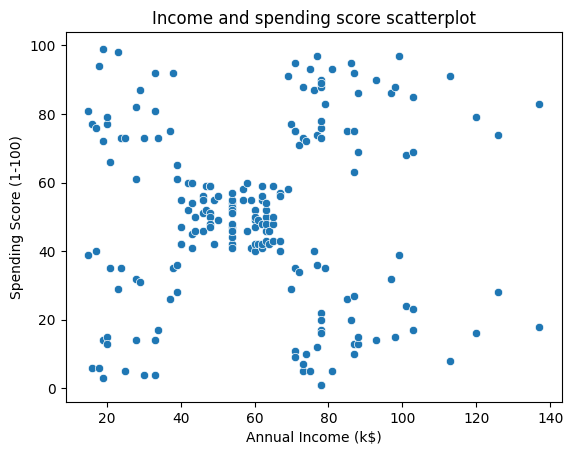

In [153]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=customer_data)
plt.title('Income and spending score scatterplot')
plt.show() # already labeled axes

#### 3. Normalize the data

In [154]:
X = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_normalized.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


#### 4. Use Elbow method to decide number of clusters

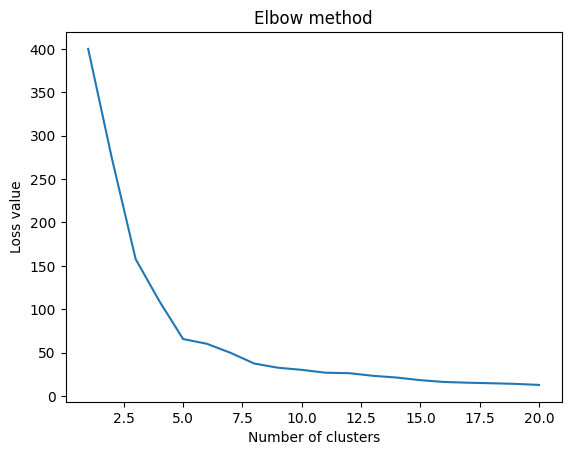

In [155]:
elbow = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, max_iter=200)
    kmeans.fit(X_normalized)
    elbow.append(kmeans.inertia_)

plt.plot(range(1,21), elbow)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Loss value')
plt.show()  # Based on the graph at 5 clusters the rapid decline stops, so that is the best number of clusters

#### 5. Perform Clustering using KMeans

In [156]:
cluster = KMeans(n_clusters=5, random_state=42)
cluster.fit(X_normalized)
y_pred = cluster.predict(X_normalized)

#### 6. Plot scatter plot and color code in clustered groups

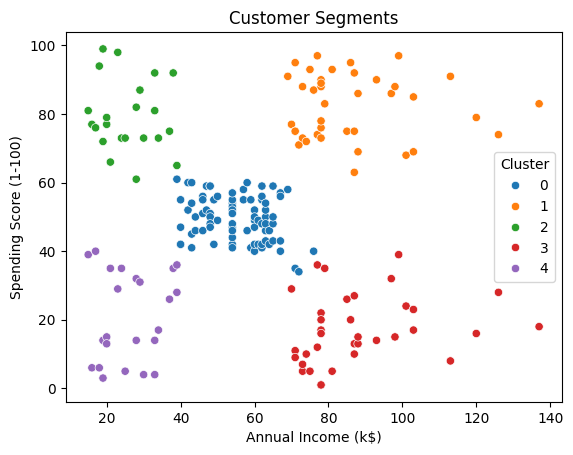

In [157]:
customer_data['Cluster'] = y_pred

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=customer_data, hue='Cluster', palette='tab10')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


#### 7. Plot dendrogram to decide number of clusters for Hierarchical Clustering. <br> Explain (free text in a markdown cell) what is the optimal number of clusters and why

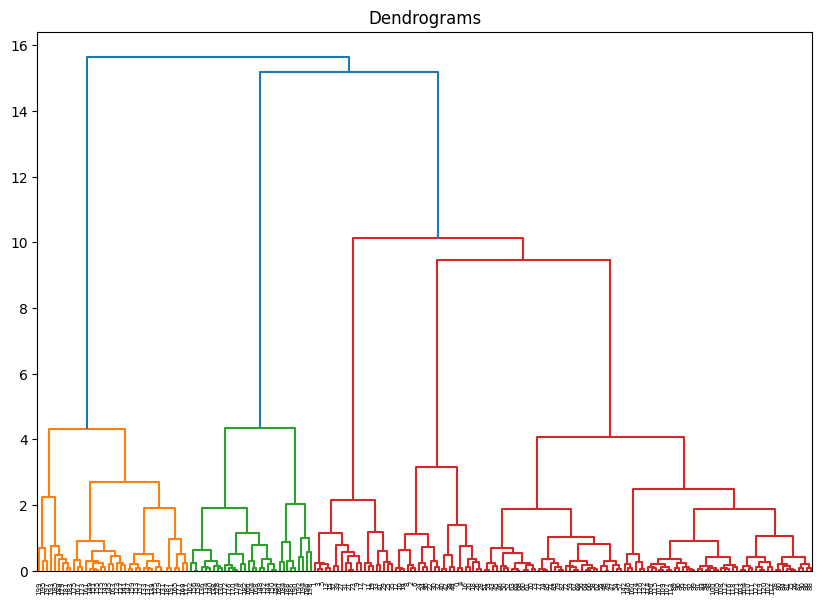

In [158]:
plt.figure(figsize=(10, 7))
plt.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(X_normalized, method='ward'))
plt.show()

Based on the dendrogram 5 is the optimal number of clusters, however 3 also works, because 3 and 5 are both stable cluster amounts.
But 3 clusters would merge important customer groups. 
Cluster count is measured by largest jump in vertical line without intersecting horizontal lines.

#### 8. Do clustering using Hierarchical Clustering

In [159]:
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_normalized)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

#### 9. Plot scatter plot and color code in clustered groups

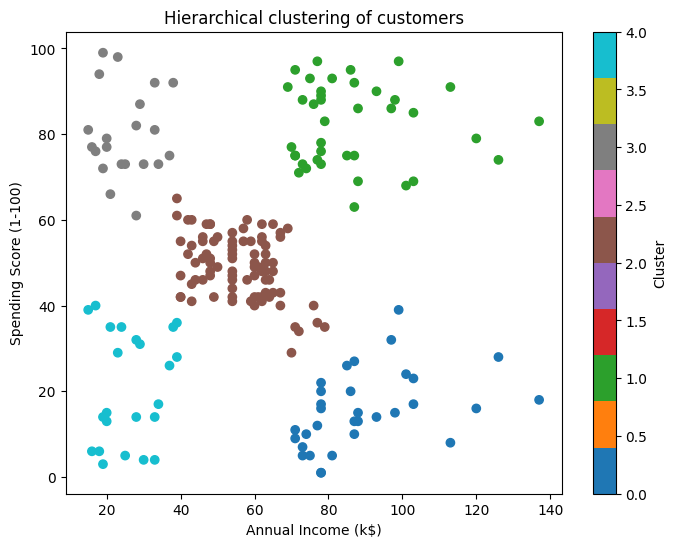

In [160]:
plt.figure(figsize=(8,6))
plt.scatter(customer_data['Annual Income (k$)'], customer_data['Spending Score (1-100)'], c=y_hc, cmap='tab10')

plt.title('Hierarchical clustering of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

####  10. Do KMeans and DBSCAN clustering on this data

In [161]:
from sklearn.datasets import make_moons
#moons_X: Data, moon_y: Labels
moons_X, moon_y = make_moons(n_samples=2000)

Text(0.5, 1.0, 'Half Moons')

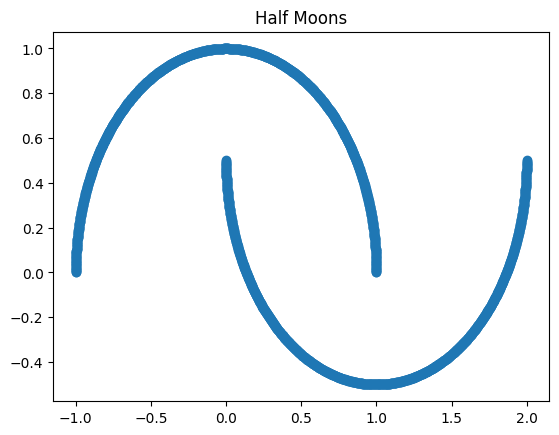

In [162]:
plt.scatter(moons_X[:,0],moons_X[:,1])
plt.title('Half Moons')

#### Using KMeans (do clustering and plot results (each cluster in own color))

In [163]:
clusterm = KMeans(n_clusters=2)
clusterm.fit_predict(moons_X)
y_predm = clusterm.predict(moons_X)

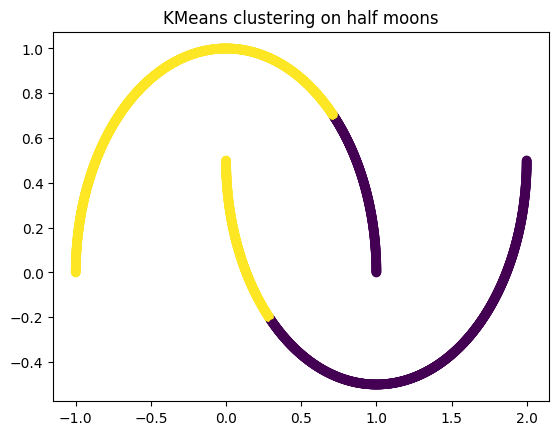

In [164]:
plt.scatter(moons_X[:, 0], moons_X[:, 1], c=y_predm)
plt.title('KMeans clustering on half moons') # dont know how to name the axis so i leave them
plt.show()

#### 11. Using DBSCAN do clustering and plot results (each cluster in own color). Find the most suitable eps and minimal samples number

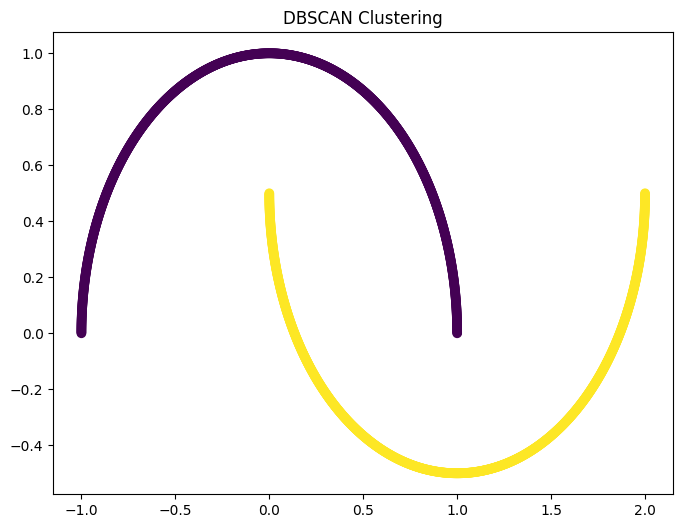

In [165]:
model = DBSCAN(eps=0.2, min_samples=2)

yhat = model.fit_predict(moons_X)
clusters = np.unique(yhat)

plt.figure(figsize=(8,6))
plt.scatter(moons_X[:, 0], moons_X[:, 1], c=yhat)
plt.title('DBSCAN Clustering')
plt.show()

#### 12. Compare the results of K-means and DBSCAN clustering
Explain why one or another is prefferable for such dataset, and differences if any.

DBSCAN is better, because it groups points based on density, Kmeans groups points based on distance to centroid.
Because of that Kmeans cannot work with data with non linear or curved shapes, it cannot group points based on shapes in data.
DBSCAN can detect outliers easily with the right epsilon value.

### Perform PCA on penguins :)
###### This section uses kaggle dataset (https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species/data)
###### The tasks below include data analysis, data preprocessing, PCA, and application of classification to predict the target

#### 13. Describe the data. Do any additional exporations as you feel

In [166]:
# Dataset
penguins = pd.read_csv('penguins.csv')
penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [167]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


#### Based on dataframe describe, in own words explain any abnormal characteristics 

Smallest flipper length is lower than 0, (-132.000000). This is physically impossible, and that is why its abnormal. This data and any other negative should be cleaned before working. 

Also the largest flipper is 5 meters, this is also physically impossible.

#### 14. Explore corrupted data

In [168]:
# find missing values. print entries with missing values, provide shape
missing_values = penguins.isnull().sum()
print("Missing values: ", missing_values)

rows_missing_values = penguins[penguins.isnull().any(axis=1)]
print("Entries with missing values: ", rows_missing_values)

print("Shape of missing values: ", rows_missing_values.shape)

Missing values:  culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64
Entries with missing values:       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
3                 NaN              NaN                NaN          NaN  NaN
8                34.1             18.1              193.0       3475.0  NaN
10               37.8             17.1              186.0       3300.0  NaN
11               37.8             17.3              180.0       3700.0  NaN
47               37.5             18.9              179.0       2975.0  NaN
246              44.5             14.3              216.0       4100.0  NaN
286              46.2             14.4              214.0       4650.0  NaN
324              47.3             13.8              216.0       4725.0  NaN
339               NaN              NaN                NaN          NaN  NaN
Shape of missing values:  (9, 5)


In [169]:
# Examine sex column
print("Unique values: ", penguins['sex'].unique())

print("\nValue counts: ", penguins['sex'].value_counts())

print("\nMissing values count: ", penguins['sex'].isnull().sum())

Unique values:  <StringArray>
['MALE', 'FEMALE', nan, '.']
Length: 4, dtype: str

Value counts:  sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64

Missing values count:  9


In [170]:
# find any unusual values. Print anomal rows
anomalies = penguins[
    (penguins['culmen_length_mm'] <= 0) |
    (penguins['culmen_depth_mm'] <= 0) |
    (penguins['flipper_length_mm'] <= 0) |
    (penguins['body_mass_g'] <= 0) |
    (penguins['flipper_length_mm'] >= 2000) |
    (~penguins['sex'].isin(['MALE', 'FEMALE']))
]
print(anomalies)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
3                 NaN              NaN                NaN          NaN   NaN
8                34.1             18.1              193.0       3475.0   NaN
9                42.0             20.2             5000.0       4250.0  MALE
10               37.8             17.1              186.0       3300.0   NaN
11               37.8             17.3              180.0       3700.0   NaN
14               34.6             21.1             -132.0       4400.0  MALE
47               37.5             18.9              179.0       2975.0   NaN
246              44.5             14.3              216.0       4100.0   NaN
286              46.2             14.4              214.0       4650.0   NaN
324              47.3             13.8              216.0       4725.0   NaN
336              44.5             15.7              217.0       4875.0     .
339               NaN              NaN                NaN          NaN   NaN

#### 15. Based on observations above, prepare the data for PCA. Only valid rows should be present. <br> Preview dataframe, show its size

In [171]:
# clean
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_valid = penguins.dropna(subset=numerical_columns + ['sex'])
penguins_valid = penguins_valid[penguins_valid['sex'] != '.']
penguins_valid.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [172]:
penguins_valid = penguins_valid[(penguins_valid['flipper_length_mm'] > 0) & (penguins_valid['flipper_length_mm'] <= 2000)]
penguins_valid.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


In [173]:
# scale numerical columns. assign to a variable X_penguins
scaler = StandardScaler()
X_penguins = scaler.fit_transform(penguins_valid[numerical_columns])
X_penguins.shape

(332, 4)

In [174]:
# assign categorical column to a variable y_penguins
y_penguins = penguins_valid['sex']
y_penguins.shape

(332,)

#### 15. Explain the chosen null values handling strategy, how it affects the dataset (+/-)

If there are rows with null values they are deleted. It is safe to do since there were only 9 rows with missing data. Removing them does not significantly affect the dataset.

#### 16. Perform PCA with 2 components. Plot the results 

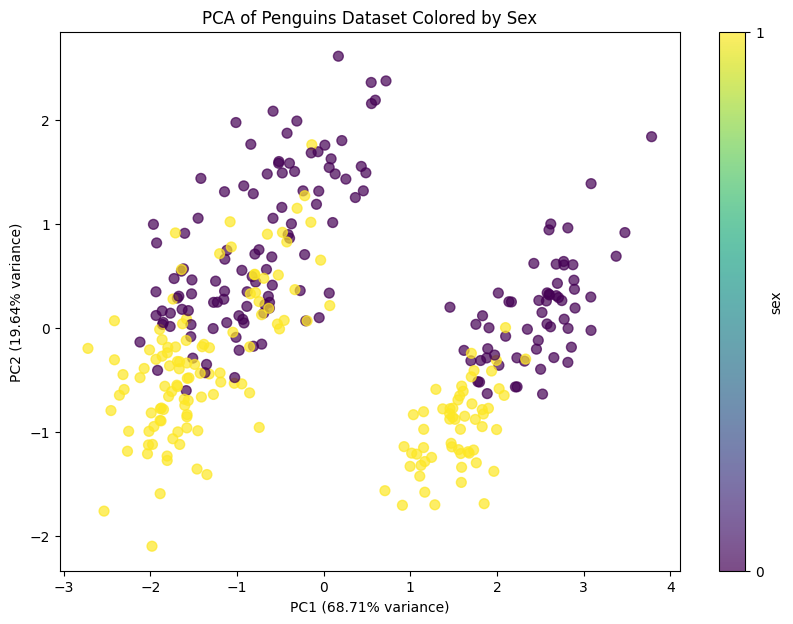

In [175]:
pca = PCA(n_components=2)
X_penguins_pca = pca.fit_transform(X_penguins)
X_penguins_pca.shape

color_map = y_penguins.map({'MALE': 0, 'FEMALE': 1})

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_penguins_pca[:, 0], X_penguins_pca[:, 1], c=color_map, cmap='viridis', s=50, alpha=0.7)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA of Penguins Dataset Colored by Sex')
plt.colorbar(scatter, ticks=[0, 1], label='sex', format='%d')
plt.show()

#### 17. Display scree plots to determine the optimal number of components and cumulative explained variance

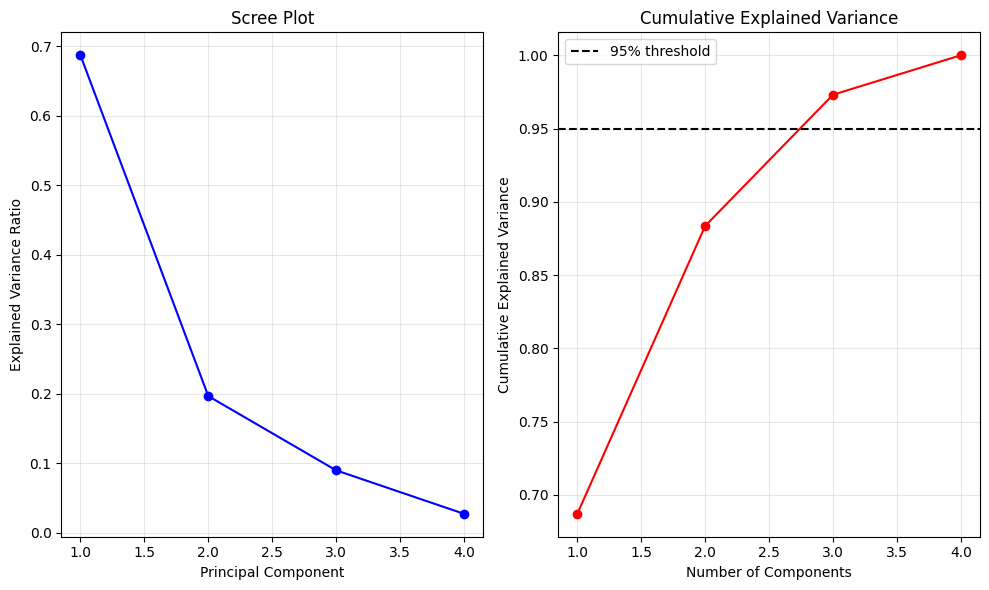

Explained variance by each component:
PC1: 68.71%
PC2: 19.64%
PC3: 8.95%
PC4: 2.69%


In [176]:
# Apply PCA with all components
pca_full = PCA()
pca_full.fit(X_penguins)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), 
         pca_full.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1),
         np.cumsum(pca_full.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='k', linestyle='--', label='95% threshold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Explained variance by each component:")
for i, var in enumerate(pca_full.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.2%}")

#### 18. Calculate (show in numbers) and display component loadings

In [177]:
# Assuming pca was fit with 2 components or you want first two components only
components_df = pd.DataFrame(
    pca.components_[:2].T,  # select first two PCs
    columns=['PC1', 'PC2'], 
    index=numerical_columns
)
print("Component loadings (feature contributions to PCs):") 
print(components_df)

Component loadings (feature contributions to PCs):
                        PC1       PC2
culmen_length_mm   0.453174  0.604990
culmen_depth_mm   -0.398518  0.792959
flipper_length_mm  0.576880  0.003798
body_mass_g        0.550478  0.072032


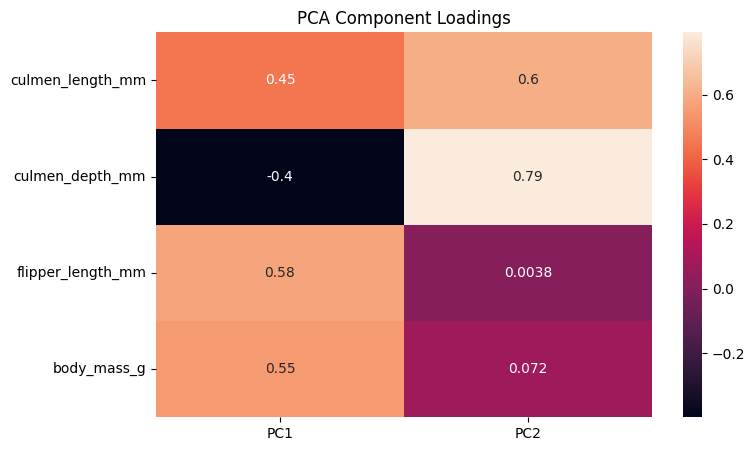

In [178]:
# show heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(components_df, annot=True)
plt.title('PCA Component Loadings')
plt.show()

#### 19. Perform logistic regression (or any other classification algorithm) and evaluate the model

In [179]:
# import necessary libraries for model training and evaluation
# Use the PCA-transformed data (X_penguins_pca) and true labels (y_penguins)
# Train and evaluate a model

X_train, X_test, y_train, y_test = train_test_split(X_penguins_pca, y_penguins, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.83
              precision    recall  f1-score   support

      FEMALE       0.85      0.84      0.84        55
        MALE       0.80      0.82      0.81        45

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



#### 20. Train the model on all data points, and determine penguin sex for the data, where it was not originally identified

In [180]:
# 1. take entries from original data without sex, scale numerical columns
missing_sex = penguins[penguins['sex'].isna() | (penguins['sex'] == '.')]

missing_sex = missing_sex.dropna(subset=numerical_columns)

X_missing = missing_sex[numerical_columns]

In [181]:
# 2. apply the same PCA transformation to the new data
X_missing_scaled = scaler.transform(X_missing)


In [182]:
# 3. Train the model
# Define X_train and y_train using all PCA data from valid data
X_missing_pca = pca.transform(X_missing_scaled)
model_all = LogisticRegression()
model_all.fit(X_penguins_pca, y_penguins)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [183]:
# 4. Make predictions on the new data. Display the features and predicted values
predictions = model_all.predict(X_missing_pca)

missing_sex['predicted_sex'] = predictions
print(missing_sex[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'predicted_sex']])

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
8                34.1             18.1              193.0       3475.0   
10               37.8             17.1              186.0       3300.0   
11               37.8             17.3              180.0       3700.0   
47               37.5             18.9              179.0       2975.0   
246              44.5             14.3              216.0       4100.0   
286              46.2             14.4              214.0       4650.0   
324              47.3             13.8              216.0       4725.0   
336              44.5             15.7              217.0       4875.0   

    predicted_sex  
8          FEMALE  
10         FEMALE  
11         FEMALE  
47         FEMALE  
246        FEMALE  
286        FEMALE  
324        FEMALE  
336        FEMALE  
